<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Can-we-capture-rate-of-a-pokemon?" data-toc-modified-id="Can-we-capture-rate-of-a-pokemon?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Can we capture rate of a pokemon?</a></span></li><li><span><a href="#Supervised-ML---Random-Forest-Regression" data-toc-modified-id="Supervised-ML---Random-Forest-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Supervised ML - Random Forest Regression</a></span></li><li><span><a href="#MLP-Regression" data-toc-modified-id="MLP-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MLP Regression</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-Predictions" data-toc-modified-id="Look-at-the-Predictions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Look at the Predictions</a></span></li></ul></li></ul></div>

In [6]:
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Can we capture rate of a pokemon?

In [7]:
#Online News Popularity from UCI Machine Learning Repository - Index of /ml/machine-learning-databases/00332

df = pd.read_csv("data/pokemon2.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [8]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [9]:
#fill missing values with 0
df.fillna(value=0, inplace=True)

In [10]:
#predict capture rate, so drop it from features and other objects we're not interested in
#we'll keep abilities

df2 = df.drop(['classfication', 'japanese_name', 'name', 'type1', 'type2'], axis=1)
df2.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.7,45,88.1,1,65,65,45,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1.0,60,88.1,2,80,80,60,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2.0,80,88.1,3,122,120,80,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.6,39,88.1,4,60,50,65,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,1.1,58,88.1,5,80,65,80,19.0,1,0


In [11]:
df2.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense             int64
speed                  int64
weight_kg            float64
generation    

In [12]:
#OHE abilities and capture_rate
df2['abilities_'] = (df2['abilities'].astype('category')).cat.codes
#df2['capture_rate_'] = (df2['capture_rate'].astype('str'))


In [13]:
#Convert capture_rate to integer - this is what we are predicting
df2['capture_rate_'] = (df2['capture_rate'].astype(str).astype(int))

In [14]:
df2['capture_rate_'].dtypes

dtype('int64')

In [15]:
df2['abilities_'].dtypes

dtype('int16')

In [17]:
df2['capture_rate_'][:20]

0      45
1      45
2      45
3      45
4      45
5      45
6      45
7      45
8      45
9     255
10    120
11     45
12    255
13    120
14     45
15    255
16    120
17     45
18    255
19    127
Name: capture_rate_, dtype: int64

In [18]:
"""#easy to catch 190 - 250
#medium hard to catch 100 - 190
#hard to catch anything less than 100
"""
#set default
df2['capture_class'] = 'easy'

df2['capture_class'] [df2['capture_rate_'] >= 190] = 'easy'
df2['capture_class'] [(df2['capture_rate_'] > 100) & (df2['capture_rate_'] < 190)]= 'medium'
df2['capture_class'] [df2['capture_rate_'] <= 100] = 'hard'

/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
"""

OLD METHOD DO NOT USE

#list(df2['capture_rate_'].unique()) <- old way
#easy to catch 190 - 250
#medium hard to catch 100 - 190
#hard to catch anything less than 100

di = {'45':'hard',
 '255':'easy',
 '120':'medium',
 '127':'medium',
 '90':'hard',
 '190':'easy',
 '75':'hard',
 '235':'easy',
 '150':'medium',
 '25':'hard',
 '170':'medium',
 '50':'hard',
 '200':'easy',
 '100':'medium',
 '180':'medium',
 '60':'hard',
 '225':'easy',
 '30':'hard',
 '35':'hard',
 '3':'hard',
 '65':'hard',
 '70':'hard',
 '125':'medium',
 '205':'easy',
 '155':'medium',
 '145':'medium',
 '130':'medium',
 '140':'medium',
 '15':'hard',
 '220':'easy',
 '160':'medium',
 '80':'hard',
 '55':'hard'}

df2['capture_rate_'].replace(di, inplace=True)
df2['capture_rate_class'] = pd.Categorical.from_array(df2.capture_rate_).labels
"""

In [24]:
df2['capture_class_label'] = pd.Categorical.from_array(df2.capture_class).labels

/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  """Entry point for launching an IPython kernel.
/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  """Entry point for launching an IPython kernel.


In [25]:
df2.iloc[5]

abilities              ['Blaze', 'Solar Power']
against_bug                                0.25
against_dark                                  1
against_dragon                                1
against_electric                              2
against_fairy                               0.5
against_fight                               0.5
against_fire                                0.5
against_flying                                1
against_ghost                                 1
against_grass                              0.25
against_ground                                0
against_ice                                   1
against_normal                                1
against_poison                                1
against_psychic                               1
against_rock                                  4
against_steel                               0.5
against_water                                 2
attack                                      104
base_egg_steps                          

In [46]:
df.iloc[5]

abilities            ['Blaze', 'Solar Power']
against_bug                              0.25
against_dark                                1
against_dragon                              1
against_electric                            2
against_fairy                             0.5
against_fight                             0.5
against_fire                              0.5
against_flying                              1
against_ghost                               1
against_grass                            0.25
against_ground                              0
against_ice                                 1
against_normal                              1
against_poison                              1
against_psychic                             1
against_rock                                4
against_steel                             0.5
against_water                               2
attack                                    104
base_egg_steps                           5120
base_happiness                    

In [20]:
#We want to predict capture_class_label
X = df2.drop(['abilities', 'capture_rate', 'capture_rate_', 'capture_class', 'capture_class_label'], axis=1)

In [27]:
y = df2['capture_class_label'].values

In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 1,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1,
       0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1,

In [29]:
X.fillna(value=0, inplace=True)

In [30]:
X.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,abilities_
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,88.1,1,65,65,45,6.9,1,0,243
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,88.1,2,80,80,60,13.0,1,0,243
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,88.1,3,122,120,80,100.0,1,0,243
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,88.1,4,60,50,65,8.5,1,0,21
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,88.1,5,80,65,80,19.0,1,0,21


In [31]:
len(X)

801

# Supervised ML - Random Forest Regression

In [34]:
#features- no need to normalize

X = features



In [35]:
X[20]

array([5.00e-01, 1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 0.00e+00, 5.00e-01, 0.00e+00, 2.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
       6.00e+01, 3.84e+03, 7.00e+01, 2.62e+02, 3.00e+01, 1.00e+06,
       3.00e-01, 4.00e+01, 5.00e+01, 2.10e+01, 3.10e+01, 3.10e+01,
       7.00e+01, 2.00e+00, 1.00e+00, 0.00e+00, 1.89e+02])

In [36]:
y[20]

0

In [37]:
X[:5]

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 5.00000e-01, 5.00000e-01,
        5.00000e-01, 2.00000e+00, 2.00000e+00, 1.00000e+00, 2.50000e-01,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 5.00000e-01, 4.90000e+01, 5.12000e+03,
        7.00000e+01, 3.18000e+02, 4.90000e+01, 1.05986e+06, 7.00000e-01,
        4.50000e+01, 8.81000e+01, 1.00000e+00, 6.50000e+01, 6.50000e+01,
        4.50000e+01, 6.90000e+00, 1.00000e+00, 0.00000e+00, 2.43000e+02],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 5.00000e-01, 5.00000e-01,
        5.00000e-01, 2.00000e+00, 2.00000e+00, 1.00000e+00, 2.50000e-01,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 5.00000e-01, 6.20000e+01, 5.12000e+03,
        7.00000e+01, 4.05000e+02, 6.30000e+01, 1.05986e+06, 1.00000e+00,
        6.00000e+01, 8.81000e+01, 2.00000e+00, 8.00000e+01, 8.00000e+01,
        6.00000e+01, 1.30000e+01, 1.00000e+00, 0.0

In [38]:
y[:5]

array([1, 1, 1, 1, 1], dtype=int8)

In [40]:
import sklearn

In [41]:
from sklearn.cross_validation import train_test_split

#partition data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 35)
(241, 35)
(560,)
(241,)


In [43]:
X_test[1]

array([2.00000e+00, 1.00000e+00, 1.00000e+00, 5.00000e-01, 1.00000e+00,
       1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 5.00000e-01,
       5.00000e-01, 2.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 5.00000e-01, 1.10000e+02, 5.12000e+03,
       7.00000e+01, 6.30000e+02, 7.50000e+01, 1.05986e+06, 1.70000e+00,
       7.00000e+01, 8.81000e+01, 2.54000e+02, 1.45000e+02, 8.50000e+01,
       1.45000e+02, 5.22000e+01, 3.00000e+00, 0.00000e+00, 2.48000e+02])

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score


--- 0.0004277229309082031 seconds ---
r2 0.8451935081148564

r2 0.850187265917603

r2 0.8564294631710362

r2 0.8576779026217228

r2 0.8551810237203495

r2 0.8551810237203495



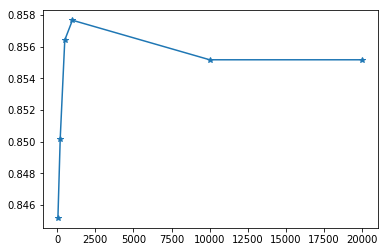

In [47]:
import time
#Tune the model 
start_time = time.time()

clf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42, n_jobs=-1)
print("--- %s seconds ---" % (time.time() - start_time))  

#n_estimators, # trees in forest
#iterate number of estimators, 30 trees... up to 2000 trees
results = []
n_estimator_options = [50, 200, 500, 1000, 10000, 20000]
for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X,y)
    score = model.oob_score_
    print("r2", score)
    results.append(score)
    print("")
pd.Series(results, n_estimator_options).plot(marker="*");

In [48]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [49]:
clf = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=42, n_jobs=-1)

In [51]:
clf.fit(X_train,y_train)
score = clf.oob_score_
print("r2", score)

r2 0.8446428571428571


In [52]:
#Predicted X_test values - these are the predicted ARS scores
yhat = clf.predict(X_test)
print(yhat)


[1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 2 0 0
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 2 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 2 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 2 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 2 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [53]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(clf, X, y).mean()
print(score)

0.8351857128987149


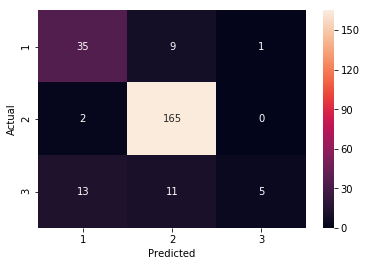

In [55]:
import seaborn

def confusion_matrix_heatmap(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
confusion_matrix_heatmap(clf, X_train, X_test, y_train, y_test)

#1 is hard, 0 is easy, 2 is medium

In [56]:
yhat[1]

1

In [57]:
y_test[1]

1

In [58]:
X_test[1]

array([2.00000e+00, 1.00000e+00, 1.00000e+00, 5.00000e-01, 1.00000e+00,
       1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 5.00000e-01,
       5.00000e-01, 2.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
       1.00000e+00, 1.00000e+00, 5.00000e-01, 1.10000e+02, 5.12000e+03,
       7.00000e+01, 6.30000e+02, 7.50000e+01, 1.05986e+06, 1.70000e+00,
       7.00000e+01, 8.81000e+01, 2.54000e+02, 1.45000e+02, 8.50000e+01,
       1.45000e+02, 5.22000e+01, 3.00000e+00, 0.00000e+00, 2.48000e+02])

In [61]:
#features for x test 1

original = df2.drop(['abilities', 'capture_rate', 'capture_rate_', 'capture_class', 'capture_class_label'], axis=1)

xtest1 = pd.DataFrame(X_test[1], index=original.columns)
xtest1

,0
against_bug,2.0
against_dark,1.0
against_dragon,1.0
against_electric,0.5
against_fairy,1.0
against_fight,1.0
against_fire,2.0
against_flying,2.0
against_ghost,1.0
against_grass,0.5


In [62]:
print(yhat[5])
print(y_test[5])

1
2


In [63]:
xtest5 = pd.DataFrame(X_test[5], index=original.columns)
xtest5

,0
against_bug,1.0
against_dark,1.0
against_dragon,1.0
against_electric,1.0
against_fairy,1.0
against_fight,2.0
against_fire,1.0
against_flying,1.0
against_ghost,0.0
against_grass,1.0


In [ ]:
#retrieve the 'name' of the pokemon

#['Overgrow', 'Unburden']
# Sceptile

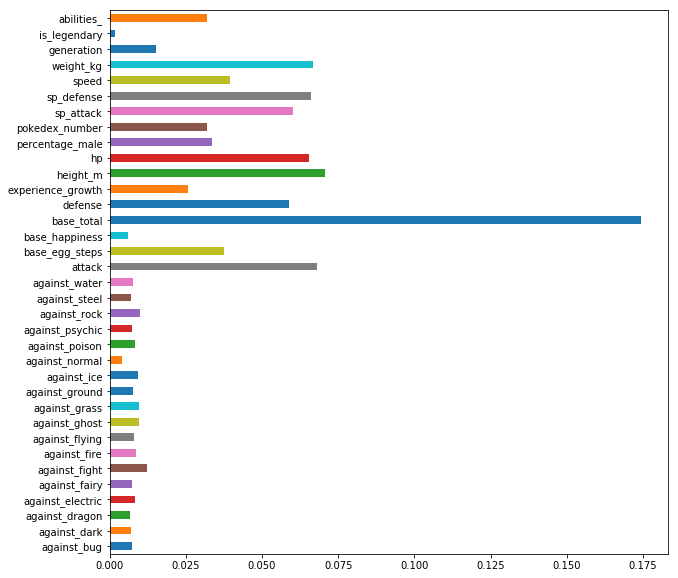

In [64]:
feature_importances = pd.Series(clf.feature_importances_, index=original.columns)
feature_importances.plot(kind='barh', figsize=(10,10))

# MLP Regression

In [181]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

<b>Normalization for MLP for later</b>

In [193]:
#Include all features to standardize
#then we'll pull out the target, capture_rate
mlp_features = df2.drop(['abilities', 'capture_rate_', 'capture_class', 'capture_class_label'], axis=1)

In [194]:
mlp_features.dtypes

against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense             int64
speed                  int64
weight_kg            float64
generation             int64
is_legendary  

In [195]:
mlp_X = mlp_features.drop('capture_rate', axis=1).values
mlp_y = mlp_features['capture_rate'].values

In [196]:
print(mlp_X.shape)
print(mlp_y.shape)

(801, 35)
(801,)


In [197]:
#Partition dataset 
X_train, X_test, y_train, y_test = train_test_split(mlp_X, mlp_y, test_size=0.3, random_state=0)

In [198]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 35)
(241, 35)
(560,)
(241,)


In [199]:
#rehape b/c scaler won't accept a column vector of (560,)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [200]:
print(y_train.shape)
print(y_test.shape)

(560, 1)
(241, 1)


In [201]:
import sklearn
from sklearn import preprocessing

#fit
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)

#transform
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)

#transform
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)


/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [203]:
#will it work?
y_train_inverse = scalery.inverse_transform(y_train)

In [204]:
y_train_inverse

array([[ 45.],
       [ 45.],
       [ 60.],
       [ 45.],
       [ 75.],
       [  3.],
       [ 60.],
       [ 45.],
       [ 45.],
       [ 90.],
       [ 45.],
       [ 75.],
       [ 90.],
       [ 45.],
       [ 60.],
       [ 45.],
       [200.],
       [ 45.],
       [ 25.],
       [ 45.],
       [ 90.],
       [ 45.],
       [ 45.],
       [ 60.],
       [ 30.],
       [190.],
       [220.],
       [ 45.],
       [  3.],
       [  3.],
       [255.],
       [200.],
       [ 90.],
       [ 60.],
       [  3.],
       [ 45.],
       [ 90.],
       [ 60.],
       [ 75.],
       [ 45.],
       [ 60.],
       [225.],
       [  3.],
       [125.],
       [  3.],
       [ 45.],
       [  3.],
       [ 75.],
       [ 75.],
       [120.],
       [180.],
       [190.],
       [255.],
       [ 45.],
       [125.],
       [ 45.],
       [ 90.],
       [  3.],
       [ 75.],
       [ 45.],
       [200.],
       [ 45.],
       [ 60.],
       [ 45.],
       [ 45.],
       [255.],
       [ 7

In [ ]:
"""
KEEP JUST IN CASE

#normalize the features -> use this later for MLP, RF IS NOT NEEDED
f1 = mlp_features.values #returns a numpy array

#invoke
min_max_scaler = preprocessing.StandardScaler()
#transform
f1_norm = min_max_scaler.fit_transform(f1) 
#turn back into df
f1_norm_df = pd.DataFrame(f1_norm, columns = mlp_features.columns)
"""

In [205]:
# define the model

model = Sequential()
model.add(Dense(35, input_dim=35, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

#fit model
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], 
                    epochs=50, 
                    batch_size=4)

Train on 560 samples, validate on 241 samples
Epoch 1/50
560/560 [==============================] - 1s 2ms/step - loss: 0.8448 - val_loss: 0.4987
Epoch 2/50
560/560 [==============================] - 1s 1ms/step - loss: 0.4235 - val_loss: 0.4073
Epoch 3/50
560/560 [==============================] - 1s 1ms/step - loss: 0.3726 - val_loss: 0.3899
Epoch 4/50
560/560 [==============================] - 1s 1ms/step - loss: 0.3475 - val_loss: 0.3850
Epoch 5/50
560/560 [==============================] - 1s 1ms/step - loss: 0.3325 - val_loss: 0.3747
Epoch 6/50
560/560 [==============================] - 1s 1ms/step - loss: 0.3205 - val_loss: 0.3805
Epoch 7/50
560/560 [==============================] - 1s 1ms/step - loss: 0.3114 - val_loss: 0.3697
Epoch 8/50
560/560 [==============================] - 1s 1ms/step - loss: 0.3052 - val_loss: 0.3697
Epoch 9/50
560/560 [==============================] - 1s 1ms/step - loss: 0.2922 - val_loss: 0.3510
Epoch 10/50
560/560 [==============================] -

In [206]:
from keras.models import load_model, Model
model.save("pokemon_mlp_2.hdf5")

In [207]:
model.save_weights("pokemon_mlp_2weights.hdf5")

In [ ]:
#if need to reload
#filename = "pokemon_weights.hdf5"
#model.load_weights(filename)
#model.compile(loss='mean_squared_error', optimizer='adam')

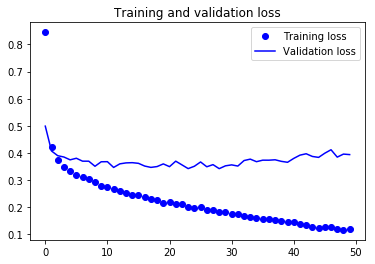

In [208]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [209]:
yhat = model.predict(X_test)

In [246]:
score = model.evaluate(X_test, y_test)

241/241 [==============================] - 0s 82us/step


In [247]:
score

0.39394646178142656

In [210]:
yhat.shape

(241, 1)

In [211]:
yhat

array([[-0.8981181 ],
       [-0.5630608 ],
       [ 0.91482705],
       [-0.6368186 ],
       [-0.5102195 ],
       [ 0.7284998 ],
       [ 0.28764343],
       [ 0.5464136 ],
       [-1.8361555 ],
       [-0.37644526],
       [-1.0264113 ],
       [ 1.2872908 ],
       [ 1.0564008 ],
       [-0.3224836 ],
       [-0.38999704],
       [-0.5062335 ],
       [-0.81565714],
       [-1.4814851 ],
       [-0.76581454],
       [ 0.0566214 ],
       [-1.5333877 ],
       [ 0.7265867 ],
       [-0.5642939 ],
       [-0.9599929 ],
       [-0.6229749 ],
       [ 1.2135911 ],
       [-0.59983784],
       [-0.6409168 ],
       [-0.48790428],
       [-0.34919804],
       [-0.28262514],
       [ 0.39816254],
       [-1.1827842 ],
       [-0.42742643],
       [ 0.85497034],
       [ 1.8184141 ],
       [-0.29719564],
       [-0.9202939 ],
       [-0.44614562],
       [-0.12575316],
       [-1.7301267 ],
       [-0.60159534],
       [-0.8519569 ],
       [ 2.3060434 ],
       [-0.592793  ],
       [-0

In [212]:
yhat_re= yhat.reshape(-1,)
print(yhat_re.shape)

(241,)


In [213]:
y_test.shape

(241, 1)

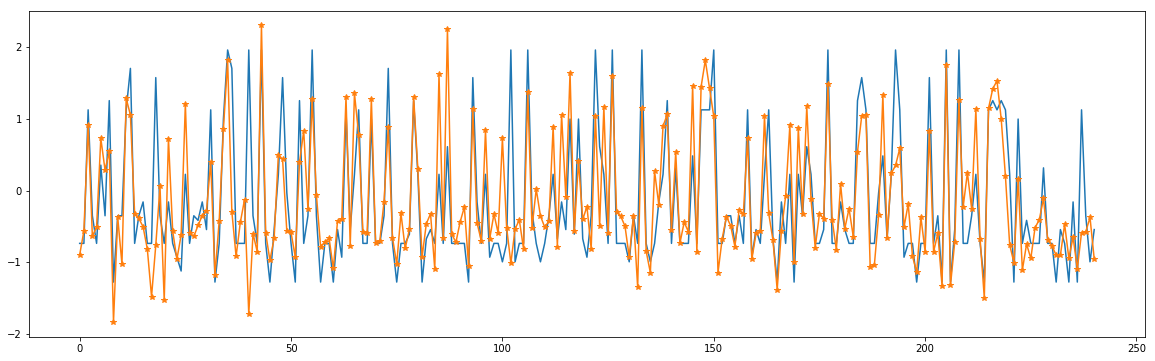

In [244]:
#plotting the first 50 samples

plt.figure(figsize=(20,6))
plt.plot(y_test)
plt.plot(yhat_re,marker="*")

plt.show()

<h2>Look at the Predictions</h2>

In [219]:
y_predictions_inverse = scalery.inverse_transform(yhat)
y_test_inverse = scalery.inverse_transform(y_test)

In [222]:
y_test_inverse

array([[ 45.],
       [ 45.],
       [190.],
       [ 75.],
       [ 45.],
       [130.],
       [ 75.],
       [200.],
       [  3.],
       [ 75.],
       [ 75.],
       [190.],
       [235.],
       [ 45.],
       [ 75.],
       [ 90.],
       [ 45.],
       [ 45.],
       [225.],
       [ 75.],
       [ 45.],
       [ 90.],
       [ 45.],
       [ 30.],
       [ 15.],
       [120.],
       [ 45.],
       [ 75.],
       [ 70.],
       [ 90.],
       [ 60.],
       [190.],
       [  3.],
       [ 45.],
       [180.],
       [255.],
       [235.],
       [ 45.],
       [ 45.],
       [ 45.],
       [255.],
       [ 75.],
       [ 45.],
       [255.],
       [ 45.],
       [  3.],
       [ 60.],
       [120.],
       [225.],
       [100.],
       [ 45.],
       [  3.],
       [200.],
       [ 45.],
       [ 75.],
       [255.],
       [ 75.],
       [  3.],
       [ 45.],
       [ 45.],
       [  3.],
       [ 60.],
       [ 30.],
       [190.],
       [ 60.],
       [120.],
       [19

In [223]:
y_predictions_inverse

array([[ 32.574837  ],
       [ 58.616898  ],
       [173.48457   ],
       [ 52.884132  ],
       [ 62.723946  ],
       [159.00244   ],
       [124.73721   ],
       [144.84993   ],
       [-40.33339   ],
       [ 73.121445  ],
       [ 22.60335   ],
       [202.43402   ],
       [184.48828   ],
       [ 77.315575  ],
       [ 72.068146  ],
       [ 63.033752  ],
       [ 38.984047  ],
       [-12.766913  ],
       [ 42.85802   ],
       [106.78121   ],
       [-16.800993  ],
       [158.85374   ],
       [ 58.521053  ],
       [ 27.765665  ],
       [ 53.960125  ],
       [196.70578   ],
       [ 55.75843   ],
       [ 52.565598  ],
       [ 64.45838   ],
       [ 75.23921   ],
       [ 80.413536  ],
       [133.32722   ],
       [ 10.449388  ],
       [ 69.15897   ],
       [168.83226   ],
       [243.71516   ],
       [ 79.28106   ],
       [ 30.851236  ],
       [ 67.70404   ],
       [ 92.60629   ],
       [-32.092392  ],
       [ 55.62183   ],
       [ 36.162674  ],
       [281

In [240]:
#true catch rate of the 100th sample
y_test_inverse[9]

array([75.])

In [241]:
#predicted catch rate of the 100th sample
y_predictions_inverse[9]

array([73.121445], dtype=float32)

In [236]:
#get original X test values
x_test_inverse = scalerX.inverse_transform(X_test)

In [242]:
#match the 100th
x_test_inverse[9]

array([1.00e+00, 1.00e+00, 1.00e+00, 5.00e-01, 1.00e+00, 1.00e+00,
       1.00e+00, 5.00e-01, 1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
       1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 5.00e-01, 1.00e+00,
       1.00e+02, 5.12e+03, 7.00e+01, 4.97e+02, 6.30e+01, 1.00e+06,
       1.60e+00, 7.50e+01, 5.00e+01, 5.23e+02, 8.00e+01, 6.30e+01,
       1.16e+02, 7.95e+01, 5.00e+00, 0.00e+00, 2.02e+02])

In [243]:
original = mlp_features.drop('capture_rate', axis=1)
xtest1 = pd.DataFrame(x_test_inverse[9], index=original.columns)
xtest1

,0
against_bug,1.0
against_dark,1.0
against_dragon,1.0
against_electric,0.5
against_fairy,1.0
against_fight,1.0
against_fire,1.0
against_flying,0.5
against_ghost,1.0
against_grass,1.0


<b>Another wider larger network but with SGD that doesn't lead to good training.</b>

In [257]:


from keras import optimizers
from keras.layers import Dropout

model = Sequential()
model.add(Dense(100, input_dim=35, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

#fit model
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], 
                    epochs=200, 
                    batch_size=4)

Train on 560 samples, validate on 241 samples
Epoch 1/200
560/560 [==============================] - 1s 3ms/step - loss: 0.7373 - val_loss: 0.4332
Epoch 2/200
560/560 [==============================] - 1s 2ms/step - loss: 0.4094 - val_loss: 0.3992
Epoch 3/200
560/560 [==============================] - 1s 2ms/step - loss: 0.3577 - val_loss: 0.3902
Epoch 4/200
560/560 [==============================] - 1s 2ms/step - loss: 0.3460 - val_loss: 0.3689
Epoch 5/200
560/560 [==============================] - 1s 2ms/step - loss: 0.3347 - val_loss: 0.3849
Epoch 6/200
560/560 [==============================] - 1s 2ms/step - loss: 0.3097 - val_loss: 0.3877
Epoch 7/200
560/560 [==============================] - 1s 2ms/step - loss: 0.2845 - val_loss: 0.3374
Epoch 8/200
560/560 [==============================] - 1s 2ms/step - loss: 0.2578 - val_loss: 0.3395
Epoch 9/200
560/560 [==============================] - 1s 2ms/step - loss: 0.2652 - val_loss: 0.3573
Epoch 10/200
560/560 [=======================

Epoch 81/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0683 - val_loss: 0.3565
Epoch 82/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0610 - val_loss: 0.3775
Epoch 83/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0533 - val_loss: 0.3761
Epoch 84/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0503 - val_loss: 0.3665
Epoch 85/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0498 - val_loss: 0.3586
Epoch 86/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0519 - val_loss: 0.3571
Epoch 87/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0546 - val_loss: 0.3849
Epoch 88/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0545 - val_loss: 0.4223
Epoch 89/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0511 - val_loss: 0.3692
Epoch 90/200
560/560 [==============================] - 1s 2ms/step - loss: 0.0553

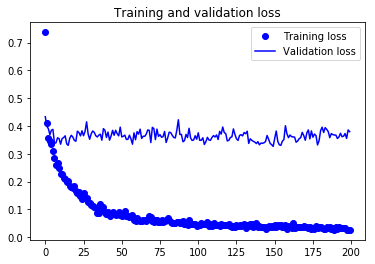

In [258]:
#shows that SGD is not a good optimizer

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [259]:
score = model.evaluate(X_test, y_test)

241/241 [==============================] - 0s 80us/step


In [260]:
score

0.37950249529478464